In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# Importing the dataset
hivData = pd.read_csv("HIV_test.csv")
hivData.head()

,education,religion,wealth_index,marital_status,usedCondom,sex_partners,residence,age,HIV_test
0,primary,catholic,poorest,never in union,yes,0.0,Rural,15,0
1,primary,protestant,poorer,never in union,yes,0.0,Rural,15,0
2,primary,catholic,poorest,never in union,yes,0.0,Rural,15,0
3,primary,catholic,middle,never in union,yes,0.0,Rural,15,0
4,secondary,protestant,poorer,never in union,yes,0.0,Rural,15,0


In [7]:
# Basic dataset information
hivData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 9 columns):
education         4882 non-null object
religion          4878 non-null object
wealth_index      4882 non-null object
marital_status    4882 non-null object
usedCondom        4873 non-null object
sex_partners      4881 non-null float64
residence         4882 non-null object
age               4882 non-null int64
HIV_test          4882 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 343.4+ KB


## Analyzing the dataset

(-1.1340223240997698, 1.7298259956074835, -1.10570363406854, 1.10243954263722)

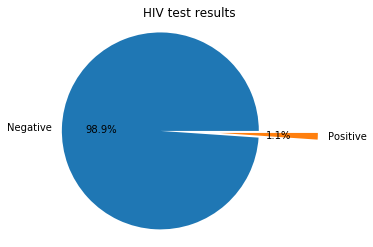

In [8]:
# Checking the distribution of HIV postives vs negatives
positive = len(hivData[hivData["HIV_test"] == 1])
negative = len(hivData[hivData["HIV_test"] == 0])
hivTest = [negative, positive]
label = "Negative", "Positive"
explode = (0, 0.6)
plt.title("HIV test results")
plt.pie(hivTest, labels=label, explode=explode, autopct='%1.1f%%')
plt.axis('equal')


In [9]:
# Analysing those who stay in rural areas vs those in urban areas
positive = hivData[hivData["HIV_test"] == 1]
negative = hivData[hivData["HIV_test"] == 0]

ruralPos = len(positive[positive["residence"]=='Rural'])
urbanPos = len(positive[positive["residence"]=='Urban'])
print("HIV positive in urban areas: ", urbanPos)
print("HIV positive in rural areas: ", ruralPos)

ruralNeg = len(negative[negative["residence"]=='Rural'])
urbanNeg = len(negative[negative["residence"]=='Urban'])

print("HIV negative in urban areas: ", urbanNeg)
print("HIV negative in rural areas: ", ruralNeg)

HIV positive in urban areas:  25
HIV positive in rural areas:  28
HIV negative in urban areas:  1240
HIV negative in rural areas:  3589


Text(0.5, 0, 'Age')

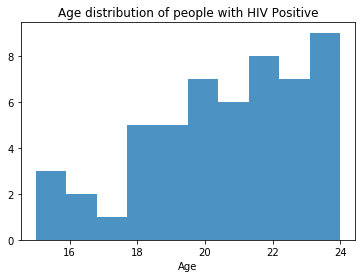

In [10]:
# Analysing the age range with most HIV positive
agePos = positive["age"]
plt.title("Age distribution of people with HIV Positive")
plt.hist(agePos, alpha=0.8)
plt.xlabel("Age")

([<matplotlib.patches.Wedge at 0x2831af0d788>,
 [Text(-0.4134103223182588, 1.0193585754780865, 'Primary'),
  Text(0.1624111973399317, -1.0879442094972565, 'Secondary'),
  Text(1.052041081285365, -0.32126245234686224, 'Not educated'),
  Text(1.0980681048831955, -0.06516469165297767, 'Higher')])

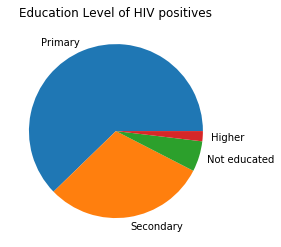

In [11]:
# Analysing the education level 
primaryPos = len(positive[positive["education"] == 'primary'])
secondaryPos = len(positive[positive["education"] == 'secondary'])
noteducatedPos = len(positive[positive["education"] == 'no education'])
higherPos = len(positive[positive["education"] == 'higher'])

educationLevel = [primaryPos, secondaryPos, noteducatedPos, higherPos]
labels = ["Primary", "Secondary", "Not educated", "Higher"]
plt.title("Education Level of HIV positives")
plt.pie(educationLevel, labels=labels)

([<matplotlib.patches.Wedge at 0x2831af60ac8>,
 [Text(1.03116162521766, 0.3830218044426114, 'Poorest'),
  Text(0.5872057017944141, 0.9301556126692617, 'Poorer'),
  Text(-0.22657650913812635, 1.0764121355255991, 'Middle'),
  Text(-0.9471479423106317, -0.5593842823826359, 'Richest'),
  Text(0.9123463061021287, -0.6145113650224875, 'Richer')],
 [Text(0.5624517955732691, 0.20892098424142438, '11.3%'),
  Text(0.32029401916058947, 0.5073576069105064, '9.4%'),
  Text(-0.12358718680261437, 0.5871338921048722, '15.1%'),
  Text(-0.5166261503512536, -0.3051186994814377, '45.3%'),
  Text(0.49764343969207014, -0.33518801728499314, '18.9%')])

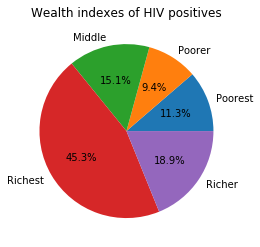

In [12]:
# Wealth index
poorestPos = len(positive[positive["wealth_index"] == 'poorest'])
poorerPos = len(positive[positive["wealth_index"] == 'poorer'])
middlePos = len(positive[positive["wealth_index"] == 'middle'])
richestPos = len(positive[positive["wealth_index"] == 'richest'])
richerPos = len(positive[positive["wealth_index"] == 'richer'])

wealth_index = [poorestPos, poorerPos, middlePos, richestPos, richerPos]
labels = ["Poorest", "Poorer", "Middle", "Richest", "Richer"]
plt.title("Wealth indexes of HIV positives")
plt.pie(wealth_index, labels=labels, autopct='%1.1f%%')

## Training a classification model

The classification model will assist in predicting if someone has a possibility of getting HIV AIDS

In [13]:
# Filling in missing value for usedCondom column and sex partners
hivData["usedCondom"] = hivData["usedCondom"].fillna(method='ffill')
avg = hivData["sex_partners"].mean()
hivData["sex_partners"] = hivData["sex_partners"].fillna(avg)
hivData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 9 columns):
education         4882 non-null object
religion          4878 non-null object
wealth_index      4882 non-null object
marital_status    4882 non-null object
usedCondom        4882 non-null object
sex_partners      4882 non-null float64
residence         4882 non-null object
age               4882 non-null int64
HIV_test          4882 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 343.4+ KB


In [14]:
hivData["religion"].unique()

array(['catholic', 'protestant', 'adventist', 'muslim', 'no religion',
       'jehovah witness', nan, 'other'], dtype=object)

In [15]:
# Turning object columns into dummies
dummy_1 = pd.get_dummies(hivData["education"])
dummy_2 = pd.get_dummies(hivData["wealth_index"])
dummy_3 = pd.get_dummies(hivData["marital_status"])
dummy_4 = pd.get_dummies(hivData["usedCondom"])
dummy_5 = pd.get_dummies(hivData["residence"])
hivData = hivData.drop(["education", "religion", "wealth_index", "marital_status", "usedCondom", "residence"], axis=1)
hivData = pd.concat([hivData, dummy_1], axis=1)
hivData = pd.concat([hivData, dummy_2], axis=1)
hivData = pd.concat([hivData, dummy_3], axis=1)
hivData = pd.concat([hivData, dummy_4], axis=1)
hivData = pd.concat([hivData, dummy_5], axis=1)
hivData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 23 columns):
sex_partners                           4882 non-null float64
age                                    4882 non-null int64
HIV_test                               4882 non-null int64
higher                                 4882 non-null uint8
no education                           4882 non-null uint8
primary                                4882 non-null uint8
secondary                              4882 non-null uint8
middle                                 4882 non-null uint8
poorer                                 4882 non-null uint8
poorest                                4882 non-null uint8
richer                                 4882 non-null uint8
richest                                4882 non-null uint8
divorced                               4882 non-null uint8
living with partner                    4882 non-null uint8
married                                4882 non-null uint8
never 

In [16]:
# prepare data for training and testing
data = hivData.drop(["HIV_test"], axis=1)
label = hivData["HIV_test"]

X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=1)

In [17]:
# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The logistic regression model has an accuracy of ", accuracy_score(y_pred, y_test)*100, "%")

C:\Users\allia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The logistic regression model has an accuracy of  99.09909909909909 %
